<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-подготовка-исходных-данных" data-toc-modified-id="Изучение-и-подготовка-исходных-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и подготовка исходных данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-временного-ряда" data-toc-modified-id="Анализ-временного-ряда-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ временного ряда</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка признаков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подбор-гиперпараметров-и-обучение-моделей" data-toc-modified-id="Подбор-гиперпараметров-и-обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подбор гиперпараметров и обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Гребневая-регрессия" data-toc-modified-id="Гребневая-регрессия-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Гребневая регрессия</a></span></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Градиентный бустинг</a></span><ul class="toc-item"><li><span><a href="#GradientBoosting-Regressor" data-toc-modified-id="GradientBoosting-Regressor-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>GradientBoosting Regressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Требуется построить модель для такого предсказания. Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

**Цель проекта**

Построить наилучшую модель для прогнозирования количества заказов такси на следующий час.

**Задачи**

1. Изучить предоставленные наборы данных, обработать для последующего анализа.
2. Проанализировать динамику количества заказов такси в зависимости от времени.
3. Подготовить данные для обучения.
4. Исследовать базовые модели и рассмотреть, как меняются показатели оценки в зависимости от примененной модели. Подобрать гиперпараметры.
5. Проверить модели на тестовой выборке, выявить наилучшую и проверить по итоговой метрике RMSE.

## Изучение и подготовка исходных данных

In [65]:
pip install catboost

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from scipy import stats as st
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

import warnings
warnings.filterwarnings("ignore")

Загрузим предоставленный файл и сохраним его в переменной taxi.

In [67]:
taxi = pd.read_csv('/content/taxi.csv')
display(taxi.head())

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


Посмотрим, столбцы с какими типами данных имеются в датасете, и есть ли там пропуски.

In [68]:
print(taxi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB
None


Пропущенных значений нет, колонок всего две. Одна из них содержит неправильный формат типа данных (object вместо даты), исправим это.

In [69]:
taxi['datetime']= pd.to_datetime(taxi['datetime'])

Проверим датасет на наличие дубликатов.

In [70]:
print('Количество дубликатов в наборе данных: {}'.format(taxi.duplicated().sum()))

Количество дубликатов в наборе данных: 0


Установим индекс таблицы равным столбцу datetime.

In [71]:
taxi = taxi.set_index('datetime')

Проверим, в хронологическом ли порядке расположены даты и время, используя атрибут is_monotonic.

In [72]:
print(taxi.index.is_monotonic)

True


Индекс таблицы сортировать не нужно. Поменяем интервал временного ряда, установим его равным одному часу.

In [73]:
taxi = taxi.resample('1H').sum()

Посмотрим, сколько наблюдений в итоге получилось.

In [74]:
print(taxi.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


Посмотрим на характеристики данного ряда.

In [75]:
print(taxi.describe())

        num_orders
count  4416.000000
mean     84.422781
std      45.023853
min       0.000000
25%      54.000000
50%      78.000000
75%     107.000000
max     462.000000


В среднем в час такси вызывают 84 раза. Однако, максимальное значение равно 462 раза, это очень далеко от среднего, а также от 75% всех случаев вызовов. Посмотрим на распределение количества заказов такси.

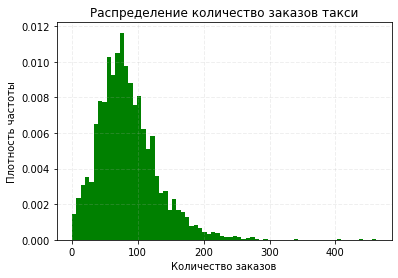

In [76]:
plt.hist(taxi['num_orders'], density=True, bins=70, color='green')
plt.title('Распределение количество заказов такси')
plt.xlabel('Количество заказов')
plt.ylabel('Плотность частоты')
plt.grid(alpha=0.2, linestyle='--', linewidth=1)

Судя по гистограмме, ряд имеет относительно небольшой разброс за исключением длинного узкого хвоста вправо. 

В данных существуют значения количества заказов, которые выходят очень далеко за пределы основного распределения. Выведем пороговое значение для 99,9% количеств всех заказов.

In [77]:
print(taxi['num_orders'].quantile(.999))

289.1900000000005


Удалять выбросы из датасета не будем, чтобы не нарушать хронологическую последовательность в данных. Однако зафиксируем сам факт наличия выбросов.

### Вывод

Компанией «Чётенькое такси» предоставлены исторические данные о заказах такси в аэропортах. В датасете всего две колонки с временным признаком и числом заказов.
Количество записей - 26496. Поскольку между ними установлены интервалы в 10 минут, а нам требуется прогнозировать количество заказов по часам, интервалы были укрупнены до одного часа. Таким образом, количество записей уменьшилось до 4416.

В датасете пропущенных значений не обнаружено, дубликатов не найдено. Колонка с датой преобразована в тип данных datetime и установлена в качестве индекса. Данные расположены в правильном хронологическом порядке.

## Анализ временного ряда

Выведем график, предварительно добавив туда скользящее среднее с размером окна, равным 200.

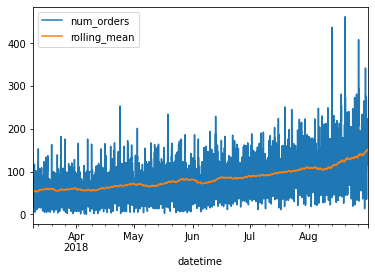

In [78]:
taxi_2 = taxi.copy()
taxi_2['rolling_mean'] = taxi_2.rolling(200).mean()
taxi_2 = taxi_2.dropna()
taxi_2.plot()

В среднем количество заказов постепенно растет. Разложим наш временной ряд на составляющие. Поскольку записей много, тренд носит долгосрочный характер, а сезонность может характеризоваться короткими циклами (в масштабах часов), то рассмотрим сразу несколько временных интервалов. Начнем с данных за весь предоставленный период.

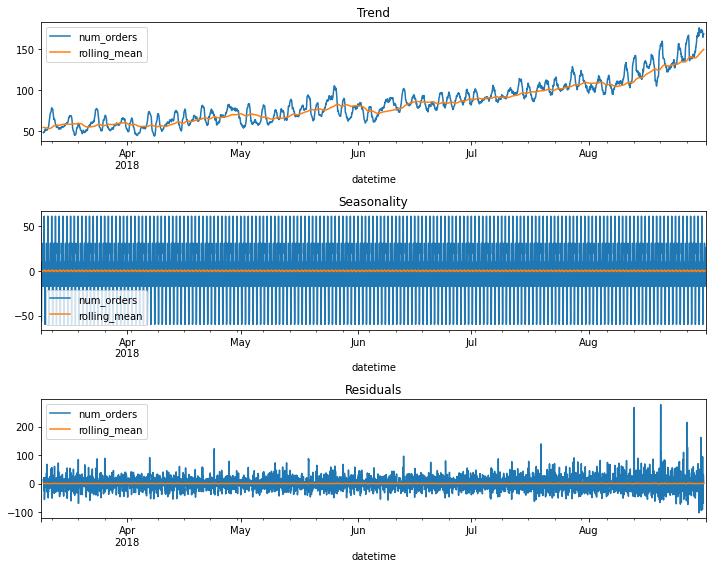

In [79]:
decomposed = seasonal_decompose(taxi_2)

plt.figure(figsize=(10, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Налицо восходящий тренд, со временем клиенты заказывают такси все чаще. Из это можно сделать вывод о том, что ряд не является стационарным.
Чтобы лучше рассмотреть сезонность, сделаем временной диапазон графика уже, возьмем 1 месяц.

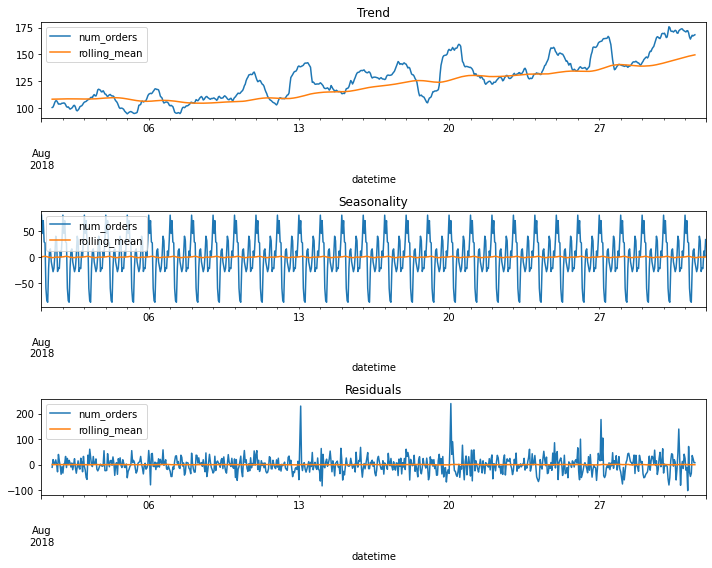

In [80]:
decomposed = seasonal_decompose(taxi_2['2018-08':])
plt.figure(figsize=(10, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

При изменении масштаба периодичность более ярко выражена. Интересно, что в остатках тоже существуют пики заказов с периодичностью в одну неделю. Возможно, это связано с сезоном отпусков, когда люди возвращаются на выходных, чтобы со следующей недели выйти на работу. Чтобы подтвердить гипотезу, неплохо было бы проанализировать данные за несколько лет.

Чтобы рассмотреть цикличные пики нагрузки по часам, возьмем данные за последние 3 дня.

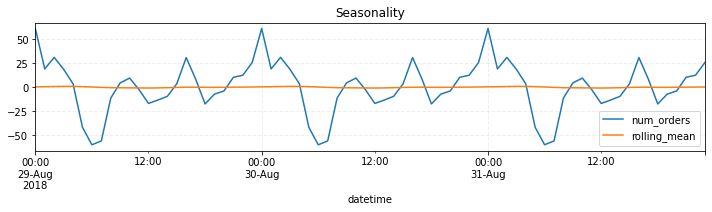

In [81]:
decomposed = seasonal_decompose(taxi_2)

plt.figure(figsize=(12, 8))

plt.subplot(312)
decomposed.seasonal['2018-08-29':].plot(ax=plt.gca())
plt.title('Seasonality')
plt.grid(alpha=0.2, linestyle='--', linewidth=1)

Самые низкие провалы рано утром (примерно 5-6 утра). Чаще всего машину заказывают в 9-10 утра, 15-16 дня, в полночь и примерно 2 ночи.

На графике изобразим скользящее среднее и скользящее стандартное отклонение.

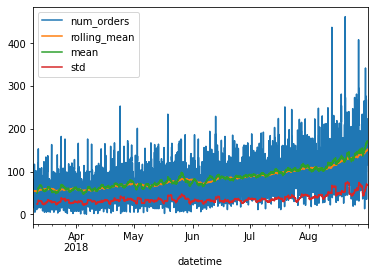

In [82]:
taxi_2['mean'] = taxi_2['num_orders'].rolling(50).mean()
taxi_2['std'] = taxi_2['num_orders'].rolling(50).std()
taxi_2.plot()

Стандартное отклонение и среднее меняются, временной ряд нельзя назвать стационарным.

### Вывод

При декомпозиции временного ряда выявлен восходящий тренд, вызов такси в аэропорт пользуется все большей популярностью. Также отчетливо прослеживается периодичность при заказе такси по часам. Самое маленькое количество заказов рано утром (5-6 утра). Чаще всего машину заказывают примерно в 9-10 утра, 15-16 дня, в полночь и около 2 ночи.  Скорее всего, это связано с расписанием рейсов.

Временной ряд не является стационарным, т.к. отчетливо прослеживается восходящий тренд (тенеднция в сторону роста количества заказов со временем), и увеличивается стандартное отклонение.

## Подготовка признаков

Напишем функцию для добавления к таблице новых календарных признаков: года, месяца, даты, дня недели и часа. 

In [83]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

Применим функцию к нашей таблице.

In [84]:
make_features(taxi, 6, 10)
display(taxi)

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,2018,8,31,4,19,207.0,217.0,197.0,116.0,133.0,166.0,173.3
2018-08-31 20:00:00,154,2018,8,31,4,20,136.0,207.0,217.0,197.0,116.0,133.0,166.6
2018-08-31 21:00:00,159,2018,8,31,4,21,154.0,136.0,207.0,217.0,197.0,116.0,162.9


Разделим датасет на обучающую и тестовую выборки. Тест составит 10% от всего набора данных.

In [85]:
train, test = train_test_split(taxi, shuffle=False, test_size=0.1)
train = train.dropna()
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 10:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


Далее из выборок выделим наборы обучающих признаков и целевой признак.

In [86]:
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

print(features_train.shape, target_train.shape)
print(features_test.shape, target_test.shape)

(3964, 12) (3964,)
(442, 12) (442,)


Чтобы привести признаки к единому масштабу, стандартизируем их методом StandardScaler и выведем первые строки получившейся таблицы (тренировочные данные).

In [87]:
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(pd.DataFrame(features_train).head())

,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 10:00:00,0.0,-1.416685,-1.597418,-0.012842,-0.216801,-0.241750,-1.146815,-1.637562,-1.714475,-1.868592,-0.910959,-1.108356
2018-03-01 11:00:00,0.0,-1.416685,-1.597418,-0.012842,-0.072267,-0.371124,-0.241335,-1.146003,-1.636850,-1.713364,-1.868109,-1.366561
2018-03-01 12:00:00,0.0,-1.416685,-1.597418,-0.012842,0.072267,0.456868,-0.370689,-0.240499,-1.145222,-1.635750,-1.712895,-1.319223
2018-03-01 13:00:00,0.0,-1.416685,-1.597418,-0.012842,0.216801,-1.250865,0.457178,-0.369857,-0.239593,-1.144196,-1.635288,-1.495663
2018-03-01 14:00:00,0.0,-1.416685,-1.597418,-0.012842,0.361335,-1.199115,-1.250298,0.458032,-0.368969,-0.238702,-1.143779,-1.641979


### Вывод

Для обучения моделей набор данных был дополнен рядом новых признаков: годом, месяцем, датой, днем недели и часом. Чтобы компенсировать нестационарность ряда, добавлен временной сдвиг. Датасет разделен на обучающую и тестовую выборки (тест составляет 10% от исходного набора), в свою очередь, получившиеся выборки преобразованы в набор с влияющими на результат факторами и целевой признак.

## Подбор гиперпараметров и обучение моделей

В проекте рассмотрено семь моделей: линейная регрессия, гребневая регрессия, дерево решений, случайный лес и три модели градиентного бустинга.

Оптимальные гиперпараметры будем подбирать с помощью функции GridSearchCV(). Поскольку перебирать гиперпараметры мы будем не один раз, объявим функцию для подбора этих гиперпараметров. На вход она будет принимать перечень параметров, тип модели, набор обучающих признаков, обучающий целевой признак, словарь для сохранения значений RMSE и наименование модели.

Возвращать функция будет метрику RMSE (среднеквадратичную ошибку). Для расчета метрики напишем функцию select_rmse и имплементируем ее в функцию подбора параметров модели.

In [88]:
select_rmse = make_scorer(mean_squared_error, greater_is_better=False)

def select_params(params, model, features, target, dictionary, name):
    tscv = TimeSeriesSplit(n_splits=8)
    mod = GridSearchCV(model, params, cv=tscv, scoring=select_rmse)
    %time mod.fit(features, target)
    rmse = (((mod.best_score_)*(-1))**0.5).round(3)
    print('rmse:', rmse)
    if name in dictionary:
        if dictionary[name] > rmse:
            dictionary[name] = rmse
    else:
        dictionary[name] = rmse
    print(mod.best_params_)

Создадим словарь, куда будем "складывать" получившиеся значения RMSE на валидационной выборке.

In [89]:
rmse_valid = {}

### Линейная регрессия

Первой моделью рассмотрим классическую линейную регрессию.

In [90]:
params = {}
select_params(params, LinearRegression(), features_train, target_train, rmse_valid, 'Linear Regression')

CPU times: user 68 ms, sys: 43.2 ms, total: 111 ms
Wall time: 65 ms
rmse: 380005669528.156
{}


Сохраним нашу модель для прогнозирования пиковых заказов.

In [91]:
%%time
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)

CPU times: user 8.52 ms, sys: 8.11 ms, total: 16.6 ms
Wall time: 12.4 ms


### Дерево решений

Рассмотрим дерево решений. Выведем rmse, какая получается при использовании гиперпараметров по умолчанию.

Используем нашу функцию для подбора, просто передав ей пустые параметры.

In [92]:
params = {}
select_params(params, DecisionTreeRegressor(random_state=12345), features_train, target_train, rmse_valid, 'Decision Tree')

CPU times: user 284 ms, sys: 73.1 ms, total: 357 ms
Wall time: 290 ms
rmse: 33.182
{}


Теперь попробуем поменять некоторые гиперпараметры.

In [93]:
params = {'max_depth': range(4,10), 'min_samples_split': [2,4,6], 'min_samples_leaf': range(1,2,4)}
select_params(params, DecisionTreeRegressor(random_state=12345), features_train, target_train, rmse_valid, 'Decision Tree')

CPU times: user 2.07 s, sys: 10.7 ms, total: 2.08 s
Wall time: 2.1 s
rmse: 28.622
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 6}


Качество модели улучшилось. Сохраним модель с подобранными гиперпараметрами.

In [94]:
model_dt = DecisionTreeRegressor(random_state=12345, max_depth=7, min_samples_split=6, min_samples_leaf=1)
%time model_dt.fit(features_train, target_train)

CPU times: user 25.6 ms, sys: 0 ns, total: 25.6 ms
Wall time: 27.5 ms


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12345, splitter='best')

### Случайный лес

Теперь попробуем использовать для прогнозирования не одно дерево, а их ансамбль. Сначала применим гиперпараметры "из коробки", которые используются в алгоритме по умолчанию.

In [95]:
params = {}
select_params(params, RandomForestRegressor(random_state=12345), features_train, target_train, rmse_valid, 'Random Forest')

CPU times: user 14.9 s, sys: 78.1 ms, total: 15 s
Wall time: 15 s
rmse: 24.894
{}


Попробуем поменять гиперпараметры модели и посмотрим, удастся ли улучшить результат. Для сокращения времени на перебор гиперпараметров рассмотрим 60 и 90 деревьев, а максимальную глубину дерева - 6, 8, 10, 12 и 14.

In [96]:
params = {'n_estimators': [60, 90], 'max_depth': [6, 8, 10, 12, 14]}
select_params(params, RandomForestRegressor(random_state=12345), features_train, target_train, rmse_valid, 'Random Forest')

CPU times: user 1min 5s, sys: 161 ms, total: 1min 6s
Wall time: 1min 5s
rmse: 24.955
{'max_depth': 14, 'n_estimators': 90}


Поскольку качество модели чуть ухудшилось, сохраним модель с изначальными гиперпараметрами.

In [97]:
model_rf = RandomForestRegressor(random_state=12345)
%time model_rf.fit(features_train, target_train)

CPU times: user 2.96 s, sys: 15.7 ms, total: 2.98 s
Wall time: 2.96 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=12345, verbose=0, warm_start=False)

### Гребневая регрессия

Попробуем применить к нашему датасету гребневую регрессию.

In [98]:
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 10000, 100000]}
select_params(params, Ridge(random_state=12345), features_train, target_train, rmse_valid, 'Ridge')

CPU times: user 459 ms, sys: 379 ms, total: 838 ms
Wall time: 441 ms
rmse: 31.446
{'alpha': 0.001}


Сохраним модель с подобранным значением alpha.

In [99]:
model_gr = Ridge(random_state=12345, alpha=0.001)
model_gr.fit(features_train, target_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=12345, solver='auto', tol=0.001)

### Градиентный бустинг

Поэкспериментируем с моделями градиентного бустинга.

#### GradientBoosting Regressor

По аналогии с предыдущими моделями сначала ничего не меняем, а потом попробуем подобрать гиперпараметры.

In [100]:
params = {}
select_params(params, GradientBoostingRegressor(random_state=12345), features_train, target_train, rmse_valid, 'GradientBoosting Regressor')

CPU times: user 4.53 s, sys: 66.7 ms, total: 4.59 s
Wall time: 4.52 s
rmse: 25.694
{}


In [101]:
params = {'max_depth': [4, 6, 8], 'n_estimators': [30, 60, 90]}
select_params(params, GradientBoostingRegressor(random_state=12345), features_train, target_train, rmse_valid, 'GradientBoosting Regressor')

CPU times: user 39.7 s, sys: 56.4 ms, total: 39.8 s
Wall time: 39.7 s
rmse: 25.292
{'max_depth': 6, 'n_estimators': 90}


Качество модели немного улучшилось, передадим модели подобранные гиперпараметры.

In [102]:
model_gb = GradientBoostingRegressor(random_state=12345, max_depth=6, n_estimators=90)
model_gb.fit(features_train, target_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=90,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=12345, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### LightGBM

Проверим качество с гиперпараметрами по умолчанию.

In [103]:
params = {}
select_params(params, LGBMRegressor(), features_train, target_train, rmse_valid, 'LightGBM')

CPU times: user 2.36 s, sys: 99.3 ms, total: 2.46 s
Wall time: 1.3 s
rmse: 24.798
{}


Попробуем улучшить качество модели.

In [104]:
params = {'n_estimators': [70, 100], 'max_depth': [6, 8, 10]}
select_params(params, LGBMRegressor(), features_train, target_train, rmse_valid, 'LightGBM')

CPU times: user 8.91 s, sys: 367 ms, total: 9.27 s
Wall time: 4.81 s
rmse: 24.712
{'max_depth': 8, 'n_estimators': 70}


Сохраняем новый вариант.

In [105]:
model_lgbm = LGBMRegressor(random_state=12345, max_depth=8, n_estimators=70)
model_lgbm.fit(features_train, target_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=8,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=70, n_jobs=-1, num_leaves=31, objective=None,
              random_state=12345, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### CatBoost

По аналогии с предыдущей моделью сначала гиперпараметры не меняем, а на следующем шаге попробуем подобрать, чтобы сделать прогноз лучше. Единственное, в params укажем logging_level='Silent', чтобы не выводить на экран промежуточные итоги.

In [106]:
params = {'logging_level': ['Silent']}
select_params(params, CatBoostRegressor(), features_train, target_train, rmse_valid, 'CatBoost')

CPU times: user 37.2 s, sys: 3.54 s, total: 40.7 s
Wall time: 21.9 s
rmse: 24.493
{'logging_level': 'Silent'}


In [107]:
params = {'logging_level': ['Silent'], 'max_depth': [4, 6, 8], 'n_estimators': [30, 60, 90]}
select_params(params, CatBoostRegressor(), features_train, target_train, rmse_valid, 'CatBoost')

CPU times: user 24.3 s, sys: 2.14 s, total: 26.5 s
Wall time: 16.2 s
rmse: 24.892
{'logging_level': 'Silent', 'max_depth': 4, 'n_estimators': 90}


Признаем, что модель до нашего вмешательства работала лучше, и оставим дефолтные значения гиперпараметров.

In [108]:
model_cb = CatBoostRegressor(random_state=12345, logging_level='Silent')
model_cb.fit(features_train, target_train)

### Вывод

В проекте было рассмотрено несколько моделей. На тренировочной выборке лучшие результаты продемонстрировал CatBoost. Проверим модели на тестовом наборе.

## Тестирование

Оформим все результаты в одну таблицу для удобства сравнения. Объявим функцию для подсчета основных метрик для моделей.

In [109]:
def compare_table(models, features, target, rmse_v):
    df = pd.DataFrame(columns=['models', 'MSE', 'R2', 'RMSE_test', 'RMSE_valid'])
    for name, model in models.items():
        prediction = model.predict(features)
        mse = mean_squared_error(target, prediction).round(3)
        rmse = (mse ** 0.5).round(3)
        r2 = r2_score(target, prediction).round(3)
        rv = rmse_v[name]
        df = df.append({'models': name, 'MSE': mse, 'R2': r2, 'RMSE_test': rmse, 'RMSE_valid': rv}, ignore_index=True)
    return df

Создадим списки моделей для предсказания пиковых нагрузок и применим функцию для расчета метрик на тренировочной и тестовой выборках.

In [110]:
models_list = {'Linear Regression': model_lr, 'Decision Tree': model_dt, 
                 'Random Forest': model_rf, 'Ridge': model_gr, 'GradientBoosting Regressor': model_gb,
              'LightGBM': model_lgbm, 'CatBoost': model_cb}

In [111]:
display('test', compare_table(models_list, features_test, target_test, rmse_valid))

'test'

,models,MSE,R2,RMSE_test,RMSE_valid
0,Linear Regression,2826.327,0.176,53.163,3.800057e+11
1,Decision Tree,2655.544,0.225,51.532,2.862200e+01
2,Random Forest,2054.871,0.401,45.331,2.489400e+01
3,Ridge,2826.327,0.176,53.163,3.144600e+01
4,GradientBoosting Regressor,2000.975,0.416,44.732,2.529200e+01
5,LightGBM,1842.019,0.463,42.919,2.471200e+01
6,CatBoost,1818.510,0.470,42.644,2.449300e+01


### Вывод

Для проверки эффективности прогнозирования, все модели были испытаны на тестовой выборке. Лучший результат на тестовой выборке выдал CatBoost с RMSE, равной 42.6, на валидационной - 24.5). Однако, LightGBM демонстрирует почти сравнимое качество (42.9 тест и 24.7 валидация).

## Общий вывод

При анализе предоставленных данных выявлена тенденция к увеличению спроса на услуги такси. Также прослеживается определенная цикличность в количестве вызовов машин: чаще всего машину заказывают примерно в 9-10 утра, 15-16 дня, в полночь и около 2 ночи, редко вызывают рано утром (5-6 часов).

Временной ряд не является стационарным (имеется восходящий тренд, увеличивается стандартное отклонение). Поэтому в целях повышения качества прогнозирования набор данных был соответствующим образом обработан, добавлены дополнительные признаки и временной сдвиг.

В целом, порог RMSE=48 на тестовой выборке преодолели только модели градиентного бустинга, а также случайный лес. Лучшие результаты продемонстрировали CatBoost (42.6) и LightGBM (42.9).